In [7]:
# Análise Exploratória do Dataset WikiHowAll

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Configurações de visualização
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Leitura dos Dados e Visualização Inicial
df = pd.read_csv('data/wikihowAll.csv')
print(f'Total de registros: {len(df)}')
print('Colunas:', df.columns.tolist())
df.head()

Total de registros: 215365
Colunas: ['headline', 'title', 'text']


,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."


In [8]:
# 2. Amostra Aleatória de Registros
df.sample(3, random_state=42)

,headline,title,text
16707,"\nFind a tobacco store that sells 1 lb.,\nBuy ...",How to Roll a Filter Cigarette with a Machine,bags of cigarette tobacco. You'll find filter...
21496,"\nMake a list of your employees.,\nIdentify ho...",How to Identify the Office VIPs in Your Company,\n\n\nUse your computer or human resources sys...
161584,"\nGather your ingredients.,\nYou can mix the i...",How to Make a Hot Chocolate Float,The ingredients you should be grabbing are: 1...


In [9]:
# 3. Verificação de Valores Ausentes
df.isnull().sum()

headline     818
title          1
text        1071
dtype: int64

In [10]:
# 4. Estatísticas Descritivas das Colunas de Texto
df['text_length'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
df['headline_length'] = df['headline'].astype(str).apply(len)
df['title_length'] = df['title'].astype(str).apply(len)
df[['text_length', 'word_count', 'headline_length', 'title_length']].describe()

,text_length,word_count,headline_length,title_length
count,215365.000000,215365.000000,215365.000000,215365.000000
mean,2472.446089,437.104237,347.412184,35.798686
std,2758.640616,480.742941,319.440157,11.543687
min,1.000000,0.000000,1.000000,3.000000
25%,751.000000,136.000000,151.000000,27.000000
50%,1668.000000,298.000000,254.000000,34.000000
75%,3025.000000,537.000000,446.000000,42.000000
max,74231.000000,12118.000000,23669.000000,134.000000


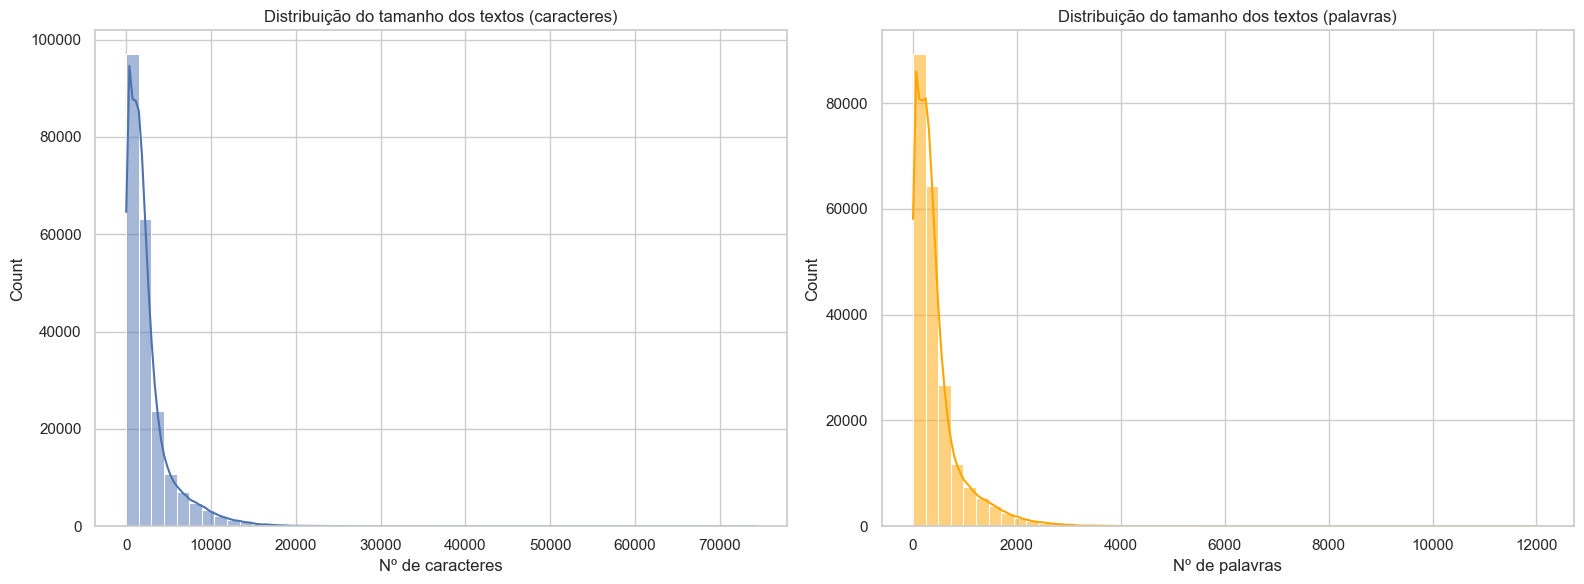

In [11]:
# 5. Distribuição do Tamanho dos Textos (Caracteres e Palavras)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df['text_length'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribuição do tamanho dos textos (caracteres)')
axes[0].set_xlabel('Nº de caracteres')
sns.histplot(df['word_count'], bins=50, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribuição do tamanho dos textos (palavras)')
axes[1].set_xlabel('Nº de palavras')
plt.tight_layout()
plt.show()

/var/folders/9n/cjjh_kr57zb00_2qkr_gk2l00000gn/T/ipykernel_2241/1489128902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_titles.index, x=top_titles.values, palette='viridis')


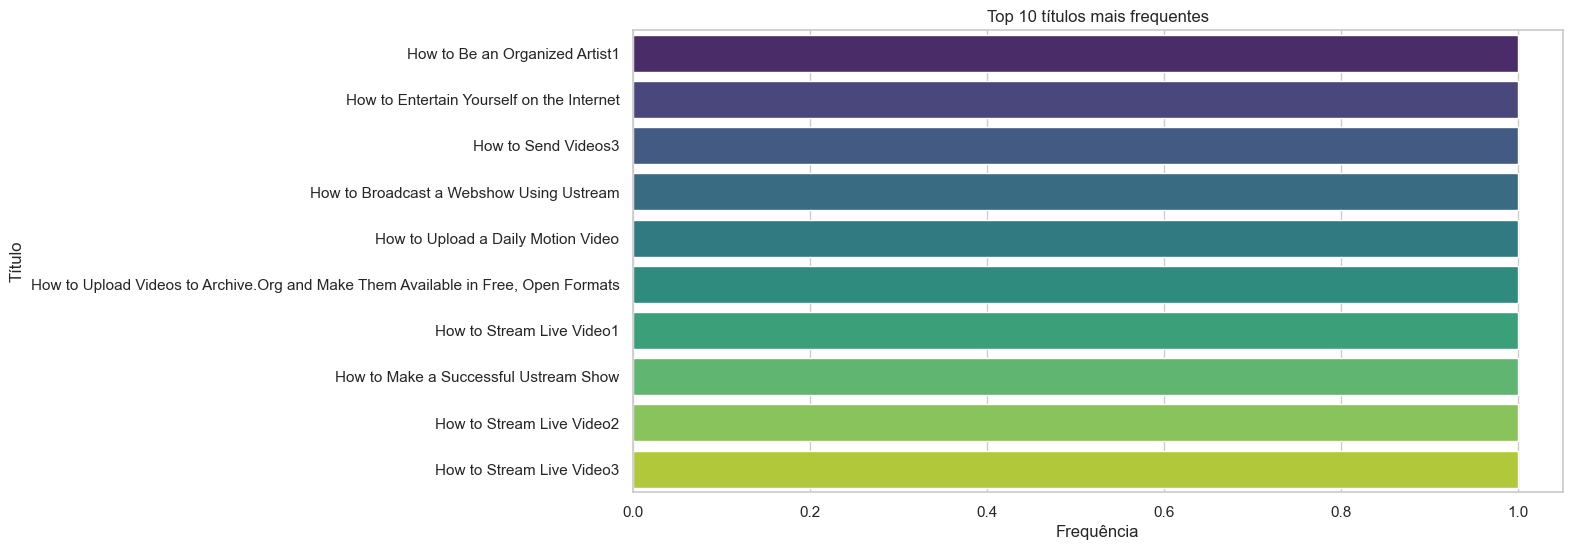

In [12]:
# 6. Títulos Mais Frequentes
top_titles = df['title'].value_counts().head(10)
sns.barplot(y=top_titles.index, x=top_titles.values, palette='viridis')
plt.title('Top 10 títulos mais frequentes')
plt.xlabel('Frequência')
plt.ylabel('Título')
plt.show()

In [13]:
# 7. Exemplo de Texto Mais Longo e Mais Curto
print('Texto mais longo:')
print(df.loc[df['word_count'].idxmax(), 'text'])
print('\nTexto mais curto:')
print(df.loc[df['word_count'].idxmin(), 'text'])

Texto mais longo:


For instance, you might use the information to help figure out when to send a newsletter: the time of day, day of week, or day of month.
You might use the information to better time your social media posts for maximum impact. For instance, do you want to post to Facebook, Twitter, and Pinterest in the morning, during the day, or in the evening? The reason it's important to understand the situation for your own website better is that there is no robust global heuristic. For instance, a blog post by CoSchedule considers sixteen different sources of advice on the best times of post, each suggesting different strategies and some of them even contradicting each other.You might use the information to buy advertisements, as well as boost existing social media posts, to show at the appropriate times: the time of day, day of week, or day of month.;
,

For instance, if your site sees a lot more traffic during the academic year than the summer, that is an indication that it is

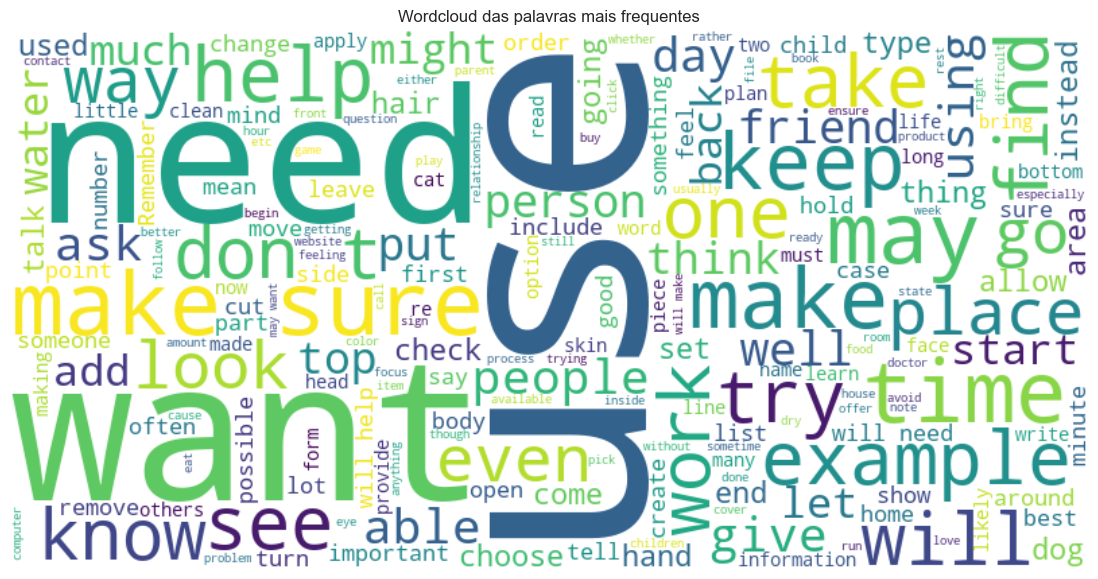

In [14]:
# 8. Wordcloud das Palavras Mais Frequentes nos Textos
text = ' '.join(df['text'].astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud das palavras mais frequentes')
plt.show()